In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize, curve_fit
import astropy.units as u
import astropy.constants as const
import math
from math import pi
import sympy
import statistics
from scipy.special import fresnel
from scipy.stats import linregress, pearsonr
from astropy.cosmology import WMAP9 as cosmo
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.signal as signal
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import (ListedColormap, LinearSegmentedColormap)

$$I_{p}(x') =I_0 \frac{1}{2}\left[\left(\frac{1}{2} + C \left[\sqrt{\frac{2}{\lambda z_0}}x'\right]\right)^2 + \left(\frac{1}{2} + S \left[\sqrt{\frac{2}{\lambda z_0}}x'\right]\right)^2\right]$$

$$C(x) = \int_{0}^x \cos{\left(\frac{\pi}{2}t^2\right)}dt \hspace{5mm} S(x) = \int_{0}^x \sin{\left(\frac{\pi}{2}t^2\right)}dt$$

In [2]:
i_0 = (1000 * u.mW).to(u.W).value
wavelength = (650 * u.nm).to(u.m).value
z_0 = (6.5 * u.cm).to(u.m).value

In [3]:
def i_p(x_prime, wavelength, i_0, z_0):
    
    fresnel_s, fresnel_c = fresnel(np.sqrt(2 / (wavelength * z_0)) * x_prime)
    c_parameter = (1/2) + fresnel_c
    s_parameter = (1/2) + fresnel_s
    return i_0 * (1/2) * (c_parameter**2 + s_parameter**2)
    

In [4]:
x_prime_array = np.linspace(-0.001, 0.001, 2500)

array([1471, 1675, 1809, 1917, 2009, 2092, 2167, 2236, 2301, 2362, 2419,
       2475], dtype=int64)

In [ ]:
# primer peak en 1471

In [54]:
teorica = pd.DataFrame()
teorica['x_prime'] = x_prime_array
teorica['i_p'] = i_p(x_prime_array, wavelength, i_0, z_0)

In [58]:
teorica

,x_prime,i_p
0,-0.001000,0.001070
1,-0.000999,0.001072
2,-0.000998,0.001073
3,-0.000998,0.001075
4,-0.000997,0.001077
...,...,...
2495,0.000997,0.952508
2496,0.000998,0.947664
2497,0.000998,0.943575
2498,0.000999,0.940301


In [57]:
# find peaks

peaks, _ = signal.find_peaks(teorica['i_p'], height=0.00, distance=1)
peaks

array([1471, 1675, 1809, 1917, 2009, 2092, 2167, 2236, 2301, 2362, 2419,
       2475], dtype=int64)

In [65]:
anti_peaks, _ = signal.find_peaks(-teorica['i_p'] + teorica['i_p'][1471], height=0.00)
anti_peaks

array([1590, 1747, 1865, 1965, 2051, 2130, 2202, 2269, 2332, 2391, 2447],
      dtype=int64)

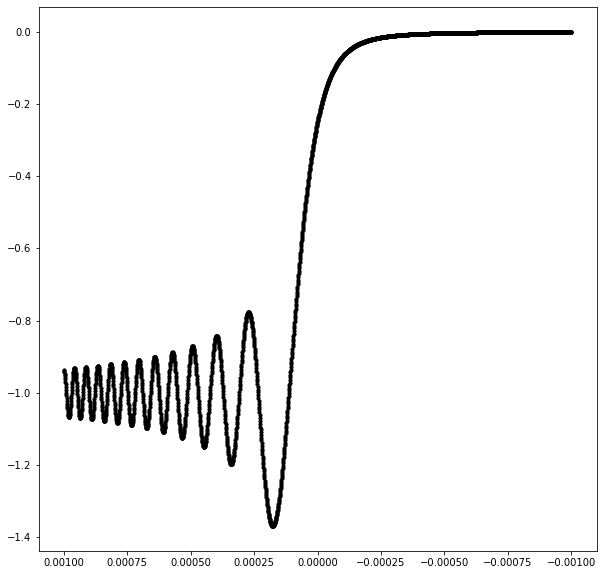

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(teorica['x_prime'], -teorica['i_p'] + teorica['i_p'][0], color='black', s=10)

# ax.set_xlim(0,1)
# ax.set_ylim(0.95, 1.05)

ax.invert_xaxis()

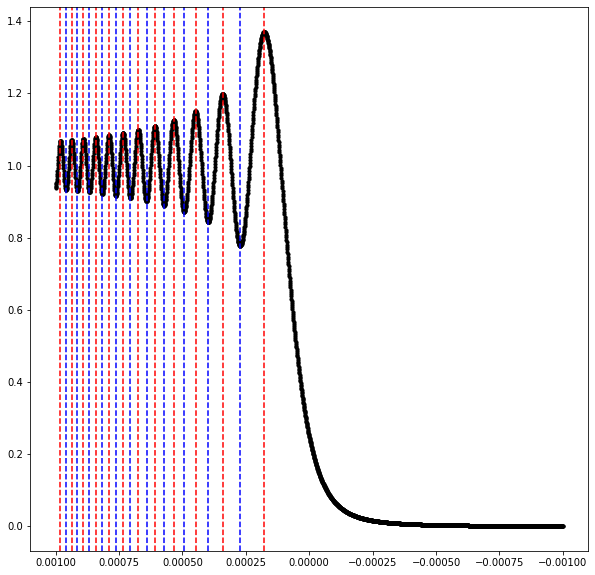

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_prime_array, i_p(x_prime_array, wavelength, i_0, z_0), color='black', s=10)

# ax.set_xlim(0,1)
# ax.set_ylim(0.95, 1.05)

ax.invert_xaxis()
for peak in peaks:
    ax.axvline(x_prime_array[peak], color='red', linestyle='--')
for anti_peak in anti_peaks:
    ax.axvline(x_prime_array[anti_peak], color='blue', linestyle='--')

In [68]:
i_0_peak_m, i_0_peak = teorica['x_prime'][1471], teorica['i_p'][1471]
i_0_antipeak_m, i_0_antipeak = teorica['x_prime'][1590], teorica['i_p'][1590]

In [15]:
noise = pd.read_csv(os.path.join('DATOS', 'noise.csv'), sep=',')
noise

,Distance_(pixels),Gray_Value
0,0,10.13519
1,1,10.13025
2,2,10.10154
3,3,10.07963
4,4,10.04568
...,...,...
700,700,8.91975
701,701,9.09907
702,702,9.09784
703,703,9.22963


In [17]:
mean_noise = np.mean(noise['Gray_Value'])
mean_noise

9.473132468085105

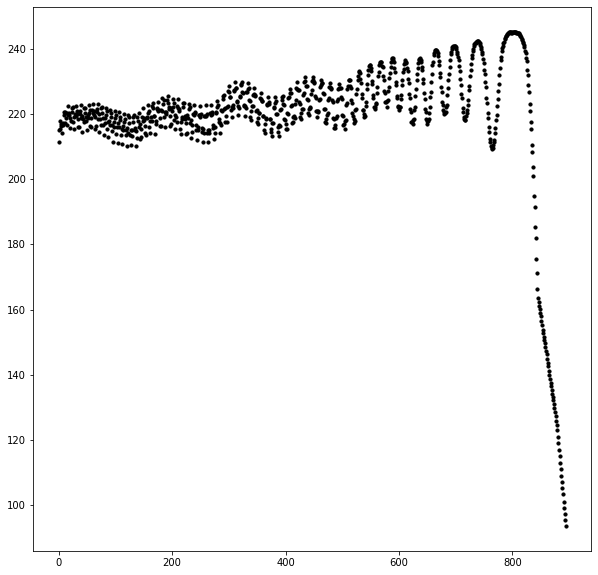

In [21]:
data = pd.read_csv(os.path.join('DATOS', 'WIN_20231122_09_18_23_Pro.csv'))
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data['Distance_(pixels)'], data['Gray_Value'] - mean_noise, color='black', s=10)

In [22]:
# find peaks

peaks, _ = signal.find_peaks(data['Gray_Value'] - mean_noise, height=0.5, distance=100)

In [24]:
peaks

array([ 69, 193, 323, 435, 589, 698, 803], dtype=int64)

In [ ]:
# primer peak en 803
# primer antipeak en 764

In [47]:
# find local minima

local_minima, _ = signal.find_peaks(-1 * (data['Gray_Value'] - mean_noise) + (data['Gray_Value'] - mean_noise)[0], height=-0.1, distance=10)

In [49]:
local_minima

array([104, 120, 136, 264, 764], dtype=int64)

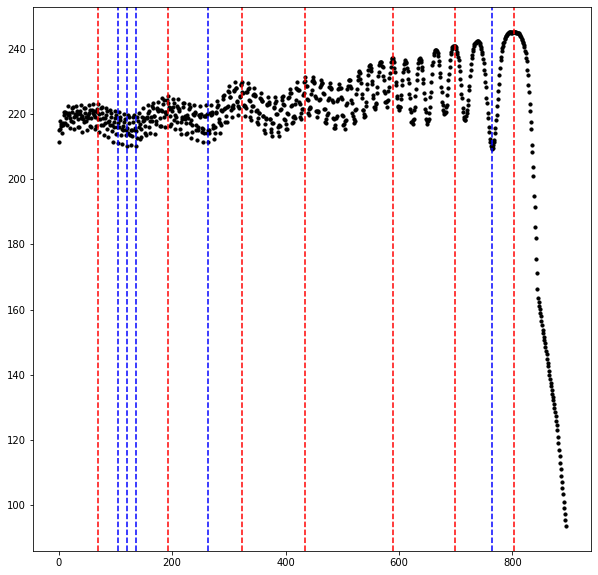

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data['Distance_(pixels)'], (data['Gray_Value'] - mean_noise), color='black', s=10)
for peak in peaks:
    ax.axvline(data['Distance_(pixels)'][peak], color='red', linestyle='--')
for local_minimum in local_minima:
    ax.axvline(data['Distance_(pixels)'][local_minimum], color='blue', linestyle='--')

In [69]:
i_0_peak_m, i_0_peak = teorica['x_prime'][1471], teorica['i_p'][1471]
i_0_antipeak_m, i_0_antipeak = teorica['x_prime'][1590], teorica['i_p'][1590]

In [70]:
data_peak_m, data_peak = data['Distance_(pixels)'][803], data['Gray_Value'][803]
data_antipeak_m, data_antipeak = data['Distance_(pixels)'][764], data['Gray_Value'][764]

In [93]:
def fit(x, a, b):
    return a * x + b

popt, pcov = curve_fit(fit, [data_peak_m, data_antipeak_m], [i_0_peak_m, i_0_antipeak_m])

c:\Users\56974\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [95]:
def fit2(x, a, b):
    return a * x + b

popt2, pcov2 = curve_fit(fit2, [data_peak, data_antipeak], [i_0_peak, i_0_antipeak])

c:\Users\56974\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [109]:
x_prime_array = np.linspace(0, 0.00215, 2500)

In [120]:
plt.rcParams.update({
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.family': 'serif',
    'font.weight': 'normal'
})

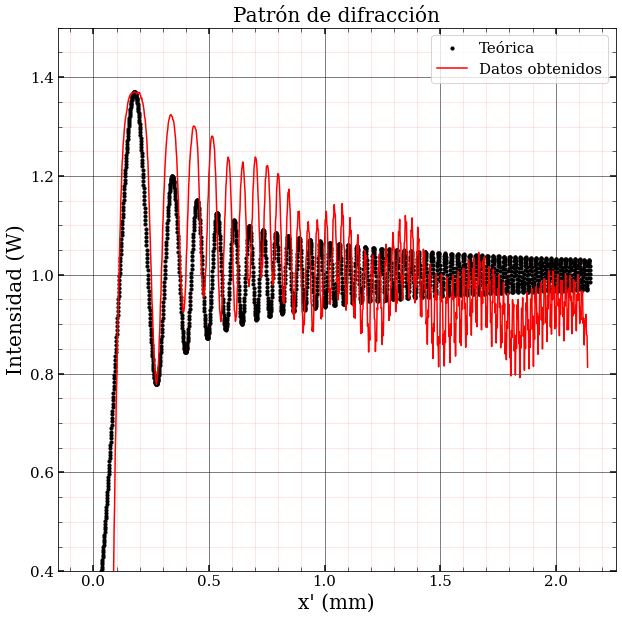

In [131]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter((x_prime_array * u.m).to(u.mm), i_p(x_prime_array, wavelength, i_0, z_0), color='black', s=10, label='Teórica')
ax.plot((np.array(fit(data['Distance_(pixels)'], *popt)) * u.m).to(u.mm), fit2(data['Gray_Value'], *popt2), color='red', label='Datos obtenidos')
ax.set_ylim(0.4, 1.5)

ax.set_ylabel(r'Intensidad (W)', fontsize=20)
ax.set_xlabel(r"x' (mm)", fontsize=20)
ax.set_title('Patrón de difracción', fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(True, which='both')
ax.legend(fontsize=15, markerscale=1)